In [ ]:
import pandas as pd
import statsmodels.api as sm
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn.model_selection import train_test_split
sp.init_printing()

# **1. Запишите структурную форму модели в матричном виде и проведите проверку идентифицируемости системы правилами ранга и порядка**

Модель в структурной форме:

$$
\begin{cases}
y_1 = b_{11}x_1 + b_{12}x_2 + u_1 \\
y_2 = a_{21}y_1 + b_{21}x_3 + u_2 \\
y_3 = a_{31}y_2 + b_{31}x_1 + u_3
\end{cases}
$$

In [ ]:
# Система содержит 3 зависимых переменных - y1, y2, y3
#  экзогенные - x1, x2, x3

Структурная форма в матричном виде:  
$AY + BX = E$

где E = \begin{pmatrix}
u_1 \\
u_2 \\
u_3
\end{pmatrix}
Y = \begin{pmatrix}
y_1 \\
y_2 \\
y_3
\end{pmatrix}
X = \begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}
тогда A = \begin{pmatrix}
1, 0, 0 \\
-a2, 1, 0 \\
0, -a3, 1
\end{pmatrix}
B = \begin{pmatrix}
-b11, -b12, 0 \\
0, 0, -b2 \\
-b3, 0, 0
\end{pmatrix}

Проверка на идентифицируемость

Правило ранга (достаточное условие идентифицируемости модели)

In [ ]:
a2, a3, b11, b12, b2, b3 = sp.symbols('a2, a3, b11, b12, b2, b3')

A = sp.Matrix([[1, 0, 0], [-a2, 1, 0], [0, -a3, 1]])

B = sp.Matrix([[-b11, -b12, 0], [0, 0, -b2], [-b3, 0, 0]])

Имеем следующую расширенную матрицу:

In [ ]:
AB = sp.Matrix.hstack(A, B)
AB

⎡ 1    0   0  -b₁₁  -b₁₂   0 ⎤
⎢                            ⎥
⎢-a₂   1   0   0     0    -b₂⎥
⎢                            ⎥
⎣ 0   -a₃  1  -b₃    0     0 ⎦

In [ ]:
def RMatrix(data):
    zeros = [i for i, value in enumerate(data) if value == 0]

    R = sp.zeros(len(zeros), len(data))
    for i, index in enumerate(zeros):
        R[i, index] = 1

    return R
for i in range(AB.shape[0]):
    print(f"{i+1}. Ранг R: {(AB * RMatrix(AB[i, :]).T).rank()}")
    display(RMatrix(AB[i, :]))

1. Ранг R: 2


⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  0  1  0  0  0⎥
⎢                ⎥
⎣0  0  0  0  0  1⎦

2. Ранг R: 2


⎡0  0  1  0  0  0⎤
⎢                ⎥
⎢0  0  0  1  0  0⎥
⎢                ⎥
⎣0  0  0  0  1  0⎦

3. Ранг R: 2


⎡1  0  0  0  0  0⎤
⎢                ⎥
⎢0  0  0  0  1  0⎥
⎢                ⎥
⎣0  0  0  0  0  1⎦

Так как все ранги R уравнений равны N−1, где N=3, то они являются идентифицируемыми по правилу ранга.(если ранг матрицы не меньше N_1, где N-общее число эндогенных переменных в системе уравнений, то уравнение идентифицируемо)

In [ ]:
# Необходимое условие  идентифицируемости (Правило порядка)
# H_i - число эндогенных переменных в структурной форме i-ого уравнения
# D_i - число экзогенных переменных, отсут. в i-ом уравнении, но присут. в системе уравнений

H1 = 1
D1 = 1

H2 = 2
D2 = 2

H3 = 2
D3 = 2

if D1 == H1 - 1:
  eq1 = 'id'
elif D1 > H1- 1:
  eq1 = 'sid'
else:
  eq1 = 'nid'

if D2 == H2 - 1:
  eq2 = 'id'
elif D2 > H2- 1:
  eq2 = 'sid'
else:
  eq2 = 'nid'

if D3 == H3 - 1:
  eq3 = 'id'
elif D3 > H3- 1:
  eq3 = 'sid'
else:
  eq3 = 'nid'

if set({eq1, eq2, eq3}) == {'id'}:
  print('Необходимое условие выполняется, проверим достаточное условие.')
if 'sid' in (eq1, eq2, eq3):
  print('Система сверхидентифицируема.')
if  'nid' in (eq1, eq2, eq3):
  print('Система неидентифицируема.')

Система сверхидентифицируема.


# **2. Какая оптимальная процедура оценивания системы, обоснуйте? Если система неидентифицируема, предложите способ для идентификации системы**

Методы оценивания коэффициентов структурной модели:
1) Косвенный метод наименьших квадратов (КМНК) - применяется
для оценивания точно идентифицируемых уравнений;
2)Двухшаговый метод наименьших квадратов (ДМНК) - использу-
ется для решения сверхидентифицированных уравнений;
3)Трехшаговый метод наименьших квадратов (ТМНК) - оценивает
параметры всей системы уравнений в целом, подходит для всех видов уравнений модели, проигрывает в эффективности ДМНК, если на некоторые параметры наложены ограничения;

Система идентифицируема по обоим правилам. Однако по правилу порядка они оказались сверхидентифицируемыми, а значит метод КМНК в данном случае не подходит. Для оценки данной системы можно воспользоваться: ДМНК, ТМНК.
ТМНК по своей сути должен справляться с данной задачей лучше (так как исправляет оценки системы путём домножения на ковариацонную матрицу), поэтому выберем его.

# **3. Оцените систему с помощью выбранной оптимальная процедуры, запишите оцененный вид спецификации.**

In [ ]:
! pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
data = pd.read_excel('/content/Задачи.xlsx', sheet_name="19", usecols="A:F")
data.head()

,x1,x2,x3,y1,y2,y3
0,1.736493,2.116245,1.817180,1.395160,1.699124,1.840681
1,1.159287,2.433806,1.902778,1.571067,1.708256,1.279491
2,1.621220,1.425894,2.507967,1.127916,2.035026,1.694397
3,0.649632,3.057172,2.459978,1.667287,2.059461,1.025082
4,1.876571,2.500471,2.374599,1.699960,2.235690,1.905164


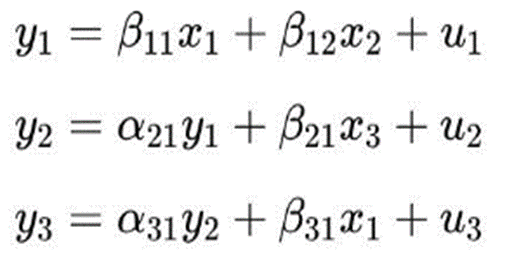

In [ ]:
# тмнк
from linearmodels import IV3SLS

eq1 = {
        'dependent': data['y1'],
        'exog': data[['x1', 'x2']],
        'endog': None,
        'instruments': data['x3']
    }

eq2 = {
        'dependent': data['y2'],
        'exog': data['x3'],
        'endog': data['y1'],
        'instruments': data[['x1', 'x2']]
    }

eq3 = {
        'dependent': data['y3'],
        'exog': data['x1'],
        'endog': data['y2'],
        'instruments': data[['x2', 'x3']]
    }

model = IV3SLS({'y1': eq1, 'y2': eq2, 'y3': eq3})

results = model.fit()
results.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                           System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.9968
No. Equations.:                     3   McElroy's R-squared:                 0.9347
No. Observations:                  50   Judge's (OLS) R-squared:             0.9321
Date:                Mon, Jun 17 2024   Berndt's R-squared:                  0.9994
Time:                        12:04:44   Dhrymes's R-squared:                 0.9968
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                     Equation: y1, Dependent Variable: y1                     
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x1             0.3181     0.0149     21.419     0.0000      0.2890      0.3472
x2             0.4660     0.0099     47.131     0.0000      0.4466      0.4854
                                                                              
===========
Instruments
-----------
         x3
           
                     Equation: y2, Dependent Variable: y2                     
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x3             0.6356     0.0229     27.700     0.0000      0.5906      0.6806
y1             0.3315     0.0446     7.4270     0.0000      0.2440      0.4190
                                                                              
===========
Instruments
-----------
     x1, x2
           
                     Equation: y3, Dependent Variable: y3                     
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
x1             0.6629     0.0224     29.618     0.0000      0.6190      0.7068
y2             0.3170     0.0152     20.807     0.0000      0.2872      0.3469
===========
Instruments
-----------
     x2, x3
-----------

Covariance Estimator:
Heteroskedastic (Robust) Covariance (Debiased: False, GLS: True)
"""

In [ ]:
results.params

y1_x1    0.318094
y1_x2    0.466027
y2_x3    0.635617
y2_y1    0.331495
y3_x1    0.662903
y3_y2    0.317038
Name: params, dtype: float64

In [ ]:
results.std_errors

y1_x1    0.014851
y1_x2    0.009888
y2_x3    0.022946
y2_y1    0.044634
y3_x1    0.022382
y3_y2    0.015237
Name: stderr, dtype: float64

Имеем следущую систему:

$$
\begin{cases}
y_1 = 0.32x_1 + 0.47x_2 + u_1 \\
\quad \, \, (0.015) \quad \, \, \, \, (0.0099) \\
y_2 = 0.33y_1 + 0.64x_3 + u_2 \\
\quad \, \, (0.04) \quad \, \, \, \, (0.02) \\
y_3 = 0.317y_2 + 0.66x_1 + u_3 \\
\quad \, \, (0.015) \quad \, \, \, \, (0.022) \\
\end{cases}
$$


Все факторы значимы.

# **4. Проиллюстрируйте графически результаты моделирования, сделайте выводы о качестве модели и о ее применимости.**

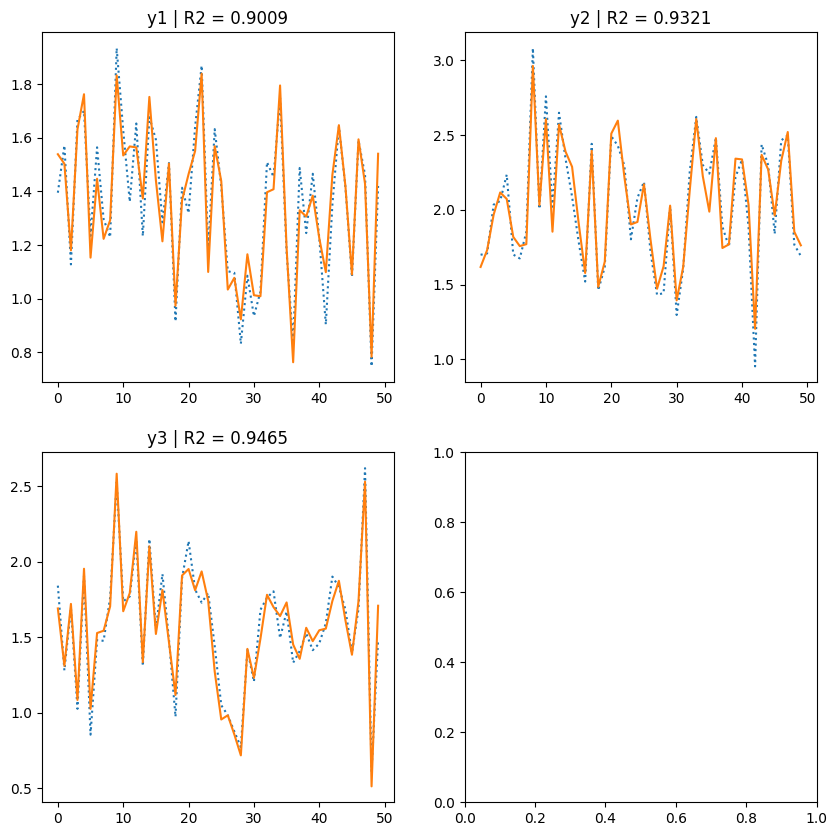

In [ ]:
from sklearn.metrics import r2_score as r2

pred = results.predict()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2, 2, 1)

plt.title(f'y1 | R2 = {r2(data["y1"], pred["y1"]):.4f}')
plt.plot(data['y1'], label='Исходный y1', linestyle=':')
plt.plot(pred['y1'], label='Предсказанный y1')

plt.subplot(2, 2, 2)

plt.title(f'y2 | R2 = {r2(data["y2"], pred["y2"]):.4f}')
plt.plot(data['y2'], label='Исходный y2', linestyle=':')
plt.plot(pred['y2'], label='Предсказанный y2')

plt.subplot(2, 2, 3)

plt.title(f'y3 | R2 = {r2(data["y3"], pred["y3"]):.4f}')
plt.plot(data['y3'], label='Исходный y3', linestyle=':')
plt.plot(pred['y3'], label='Предсказанный y3')

plt.show()

Модель очень хорошо предсказала данные. Видно, что модель ТМНК  справился с моделированием ряда. В условиях системы данный результат показывает себя с хорошей стороны. И хотя константы в уравнениях нет, R2 показывает высокий результат.